In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import dataframe_gen as dfgen
import DVH


import matplotlib.pyplot as plt

### First we need to import our DVHs in some usable way.
#### We will run a custom function to generate well-formatted Pandas DataFrames, 1 for each plan
Pandas DataFrames are essentially like a mini-excel spreadsheet you can manipulate in just about any way imaginable

In [2]:
dvh_list = dfgen.generate_DataFrames()

144 csv files found.
Your final list contains 144 dvhs
72 Proton and 72 VMAT csv files were found.
72 DVHs w/CTVs and 72 DVHs w/PTVs are in your final list.


### Good, our function found all the DVH files and imported them without any errors. 
Now let's check a random dataframe from our list of DVHs:

In [3]:
dvh_list[0][29]

,Dose,PTV,Ipsilateral Kidney,Contralateral Kidney,Stomach,Duodenum,Small Bowel,Large Bowel,Liver,Heart,Cord,Skin Rind
0,0,100,100,100,100,100,100,100,100,100,100,100
1,0.1,100,100,100,14.1174,100,86.3713,74.1672,28.3667,0,62.3531,31.393
2,0.2,100,100,99.8147,1.12802,100,70.1198,54.2955,20.6696,0,58.8689,23.7736
3,0.3,100,100,93.4146,0,96.3507,54.419,41.0776,14.8663,0,56.0392,20.4369
4,0.4,100,100,84.7204,0,89.8336,47.401,33.896,10.5164,0,52.5971,18.5832
5,0.5,100,100,79.4545,0,82.9365,43.5769,29.6231,7.8929,0,48.5439,17.2413
6,0.6,100,100,76.0657,0,76.8048,41.1168,26.8396,6.23539,0,44.6428,16.0298
7,0.7,100,100,73.5519,0,72.1997,39.049,24.2505,5.16823,0,41.661,14.708
8,0.8,100,100,71.5771,0,68.8961,37.2499,22.0654,4.33527,0,39.1972,13.5892
9,0.9,100,99.9997,69.8437,0,66.7736,35.7203,19.4844,3.69463,0,37.0348,12.6285


#### This is the first DVH from our first patient. 
##### As you can see, this particular DVH is for Patient 1, and is the VMAT Plan for the 4 cm tumor in the right posterior mid kidney.
Ordering of DVHs doesn't matter much at the moment, we'll do all our sorting later. 


In [3]:
# Let's set a patient and DVH variable, so it's easy to evalute any plan
# If you want to see the plot for a different patient or plan, just change these numbers
pt = 0
plan = 29
dvh = dvh_list[pt][plan]

#### OK. We have tabular DVHs. Pandas has some nice baked-in plotting functions. Let's visualize this DVH:

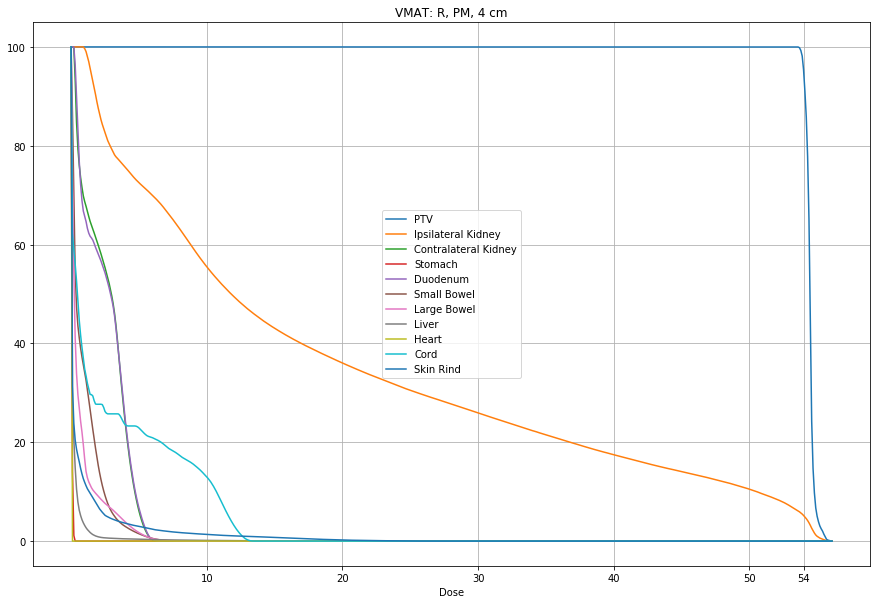

In [4]:
indexes = ['Volume', 'Pt', 'Modality', 'Side', 'Loc', 'Size']
modality = dvh.loc['Modality'][0]
side = dvh.loc['Side'][0]
loc = dvh.loc['Loc'][0]
size = dvh.loc['Size'][0]

title = '{}: {}, {}, {} cm'.format(modality, side, loc, size)
dvh.drop(index=indexes).plot(x='Dose', title=title, figsize=(15,10),
                                            grid=True, xticks=[10,20,30,40,50,54])

#### We can do this for any DVH we want, just go back and change the 'pt' and 'plan' variables
## OK. Now for the fun stuff! Let's play with the data.
### We will want to be able to ask specific questions about these.  Mostly, we want to know how much dose a specified volume of tissue is getting, or we want to know how much volume is recieving a specified dose. We will want to be able to do this for specific ROIs.

I have written custom functions 'volume_at_dose()', and 'dose_at_volume()' which will accept as input any DVH in the DataFrame format above, any list of ROIs you're interested in, and the relevant dose or volume.

In [5]:
# Let's first ask what the maximum dose to 10cc is. Output will be in units of Gy:

dose_DF1 = DVH2.dose_at_volume(dvh, 10)
dose_DF1.head()

,PTV,Ipsilateral Kidney,Contralateral Kidney,Stomach,Duodenum,Small Bowel,Large Bowel,Liver,Heart,Cord,Skin Rind,Pt,Modality,Side,Loc,Size
D at 10 cc or whole organ,54.6,54.5,5.3,0.3,4.8,5.9,5.3,5.1,0.0,2.4,16.6,1.0,VMAT,R,PM,4


In [9]:
dose_DFd = DVH2.volume_at_dose(dvh, 12)
dose_DFd.head()

,PTV,Ipsilateral Kidney,Contralateral Kidney,Stomach,Duodenum,Small Bowel,Large Bowel,Liver,Heart,Cord,Skin Rind,Pt,Modality,Side,Loc,Size
V getting at least 12 cGy,51.0,148.6,0.0,0.0,0.0,0.0,0.0,2.4,0.0,1.2,18.7,1.0,VMAT,R,PM,4


### Excellent. Now let's just get the dose at 1.0 cc for the heart:

In [10]:
roi = ['Heart']
dose_DF2 = DVH2.dose_at_volume(dvh, 20, roi)
dose_DF2

,Heart,Pt,Modality,Side,Loc,Size
D at 20 cc or whole organ,0.0,1.0,VMAT,R,PM,4


### Now let's build a dataframe that contains the dose at 1.0 cc for the Heart and Spinal Cord for every patient in our list:

In [11]:
dose_DF2.iloc[:,-5:]

,Pt,Modality,Side,Loc,Size
D at 20 cc or whole organ,1.0,VMAT,R,PM,4


In [199]:
roi = ['Heart', 'Cord']
volume = 14

dose_DF3 = DVH2.analyze(dvh_list, method='Dose at Vol', value=volume, roi=roi)
dose_DF3.tail()

Heart  Cord
Pt   Modality Side Loc  Size             
Pt 3 VMAT     R    Pelv 2 cm    0.0   0.2
                        4 cm    0.0   0.9
                   Sup  1 cm    0.0   0.2
                        2 cm    0.2   0.4
                        4 cm    0.5   0.6

### We now have a multi-indexed array with the dose to 1 cc of tissue for the heart and cord!
#### Let's do some stats! Let's ask if, overall, there's a significant difference between photons vs protons, all comers, for the D1cc

In [200]:
#First, we need to generate separate arrays of the proton plans, and the VMAT plans
x = dose_DF3.xs(['Proton'], level=['Modality'])
y = dose_DF3.xs(['VMAT'], level=['Modality'])

In [201]:
# Because these are dependently correlated measurements, and we cannot assume a normal distribution:
# We will use the Wilcoxon Signed Rank test to measure statistical significance
result = pd.DataFrame()
for i, col in enumerate(x.columns):
    mean = np.asarray([x[col].mean(), y[col].mean()]).reshape(2,1)
    std = np.asarray([x[col].std(), y[col].std()]).reshape(2,1)
    p = np.asarray([0, stats.wilcoxon(x[col], y[col])[1]]).reshape(2,1)
    sts = np.concatenate([mean,std,p], axis=1)
    cols = [col+' Mean', col+' Std', col+' p value']
    temp = None
    temp = pd.DataFrame(sts, index=['Proton', 'Vmat'], columns=cols)
    result = pd.concat([result, temp], axis=1)
    
result

,Heart Mean,Heart Std,Heart p value,Cord Mean,Cord Std,Cord p value
Proton,0.000000,0.000000,0.000000,0.050000,0.087210,0.000000e+00
Vmat,0.091667,0.223764,0.000608,0.452778,0.367317,1.295931e-11


### There it is! D1cc is significantly better for Protons vs VMAT

In [245]:
roi = ['Ipsilateral Kidney']
dose = 10

dose_DF3 = DVH2.analyze(dvh_list, method='Vol at Dose', value=dose, roi=roi, absolute=False)
dose_DF3.head()

Ipsilateral Kidney
Pt   Modality Side Loc      Size                    
Pt 1 Proton   L    Inf      1 cm                 6.4
                            2 cm                 7.6
                            4 cm                14.8
                   Post Mid 1 cm                10.5
                            2 cm                15.1

In [246]:
spared = (dose_DF3 - 100) * -1

In [247]:
dose_DF3.xs(key=['VMAT', 'R', 'Post Mid', '4 cm'], level=['Modality', 'Side', 'Loc', 'Size'])

,Ipsilateral Kidney
Pt,
Pt 1,55.5
Pt 2,77.4
Pt 3,69.6


In [248]:
#x = spared.xs((('2 cm'), ('4 cm')), level=('Size'))
x = spared.loc[(slice(None), 'Proton', slice(None), ('Inf', 'Sup', 'Pelv')), :]
#y = spared.xs(['VMAT', '2 cm'], level=['Modality', 'Size'])
y = spared.loc[(slice(None), 'VMAT', slice(None), ('Inf', 'Sup', 'Pelv')), :]

In [249]:
x,y

(                              Ipsilateral Kidney
 Pt   Modality Side Loc  Size                    
 Pt 1 Proton   L    Inf  1 cm                93.6
                         2 cm                92.4
                         4 cm                85.2
                    Pelv 1 cm                83.3
                         2 cm                73.9
                         4 cm                52.0
                    Sup  1 cm                90.9
                         2 cm                88.0
                         4 cm                83.0
               R    Inf  1 cm                94.5
                         2 cm                91.0
                         4 cm                84.4
                    Pelv 1 cm                79.5
                         2 cm                70.9
                         4 cm                46.1
                    Sup  1 cm                91.1
                         2 cm                86.3
                         4 cm                80.1


In [250]:
result = pd.DataFrame()
for i, col in enumerate(x.columns):
    mean = np.asarray([x[col].mean(), y[col].mean()]).reshape(2,1)
    std = np.asarray([x[col].std(), y[col].std()]).reshape(2,1)
    p = np.asarray([0, stats.wilcoxon(x[col], y[col])[1]]).reshape(2,1)
    sts = np.concatenate([mean,std,p], axis=1)
    cols = [col+' Mean', col+' Std', col+' p value']
    temp = None
    temp = pd.DataFrame(sts, index=['Proton', 'Vmat'], columns=cols)
    result = pd.concat([result, temp], axis=1)
    
result

,Ipsilateral Kidney Mean,Ipsilateral Kidney Std,Ipsilateral Kidney p value
Proton,73.631481,18.923160,0.000000
Vmat,74.314815,19.330965,0.038708


In [214]:
boarding_pass = {
    'Cord 1': '< 0.03 cc to 18 Gy',
    'Cord 2': 'Dmax 22.2 Gy',
    'Small Bowel 1': '< 10 cc to 11.4 Gy',
    'Small Bowel 2': '< 1 cc to 24 Gy',
    'Small Bowel 3': 'Dmax 30 Gy',
    'Large Bowel': 'Minimize volume > 30 Gy',
    'Skin Rind': '< 10 cc to 30 Gy',
    'Liver 1': '< 700 cc to 15 Gy',
    'Liver 2': 'V17 Gy < 66%',
    'Heart': 'Dmax 27.9 Gy',
    'Contralateral Kidney 1': 'V10 Gy < 33%',
    'Contralateral Kidney 2': 'V5 % < 14 Gy',
    'Stomach 1': '< 10 cc to 16.5 Gy',
    'Stomach 2': '5 cc < 22.5 Gy',
    'Stomach 3': 'Dmax 30 Gy',
}

In [92]:
type(boarding_pass)

dict

In [93]:
def volume_at_dose(dvh_full, ROI, dose):
    dvh = dvh_full.drop(index=['Volumes', 'Modality', 'Side', 'Loc', 'Size'])
    pervol = None
    absvol = None
    #Check if dose exists:
    if dose < 0:
        raise ValueError("Your input dose less than 0. Please input a dose > 0.")
    if dose > dvh['Dose (cGy)'].max():
        pervol = 0
        absvol = 0 
        return pervol, absvol
    
    level = 0
    i = 0
    while level <= dose:
        if dvh['Dose (cGy)'][i] >= dose:
            level = dvh['Dose (cGy)'][i]
            break
        else:
            i+=1
    
    #index row is <i>, dose at <i> is <level>
    if level == dose:
        pervol = dvh[ROI][i]
        absvol = pervol / 100 * dvh_full[ROI]['Volumes']
        return pervol, absvol
    
    pervol = np.interp(dose, xp=[dvh['Dose (cGy)'][i-1], level], fp=[dvh[ROI][i-1], dvh[ROI][i]])
    absvol = pervol / 100 * dvh_full[ROI]['Volumes']
    return pervol, absvol

In [94]:
def dose_at_volume(dvh_full, ROI, volume):
    dvh = dvh_full.drop(index=['Volumes', 'Modality', 'Side', 'Loc', 'Size'])
    absdose = None
    perdose = None
    #Check if volume exists:
    if volume > dvh[ROI]['Volumes']:
        raise ValueError('Input volume greater than ROI volume. Resetting input to ',dvh[ROI]['Volumes'])
        volume = dvh[ROI]['Volumes']
    if volume < 0:
        raise ValueError('Input volume < 0. Please try again with positive volume.')
    
    level = 0
    i = 0
    while level <= volume:
        if dvh['Dose (cGy)'][i] >= dose:
            level = dvh['Dose (cGy)'][i]
            break
        else:
            i+=1
    
    #index row is <i>, dose at <i> is <level>
    if level == dose:
        pervol = dvh[ROI][i]
        absvol = pervol / 100 * dvh_full[ROI]['Volumes']
        return pervol, absvol
    
    pervol = np.interp(dose, xp=[dvh['Dose (cGy)'][i-1], level], fp=[dvh[ROI][i-1], dvh[ROI][i]])
    absvol = pervol / 100 * dvh_full[ROI]['Volumes']
    return pervol, absvol        

In [94]:
dvh = dvh_list[pt][plan]
dose = 600
ROI = 'PTV'

In [95]:
pervol, absvol = volume_at_dose(dvh, ROI, dose)
print('Percent vol at',dose,'Gy: ', pervol,'%')
print('Absolute vol at',dose,'Gy: ', absvol,'cc')

Percent vol at 600 Gy:  0 %
Absolute vol at 600 Gy:  0 cc


In [17]:
def find_idx_nearest_val(array, value):
    idx = int(np.searchsorted(-array, -value, side="right"))
    print(idx)
    if idx >= len(array):
        idx_nearest = idx-1
    elif idx == 0:
        idx_nearest = idx
    else:
        if abs(value - array[idx-1]) < abs(value - array[idx]):
            idx_nearest = idx-1
        else:
            idx_nearest = idx
    return idx_nearest

In [18]:
ts = DVH.abs_vol_DVH(dvh)
for col in ts:
    print(find_idx_nearest_val(ts[col], 1))

1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
141
141
549
548


In [53]:
iterables = [['2 cm', '1 cm', '4 cm'], ['Inf', 'Sup', 'PM', 'Pelv'], ['L', 'R'], ['VMAT', 'Proton'], ['Pt 1', 'Pt 2', 'Pt 3']]
names = ['Pt', 'Modality', 'Side', 'Loc', 'Size']

In [54]:
x = dict(zip(names, iterables))

In [55]:
x = OrderedDict(x)

In [56]:
x

OrderedDict([('Pt', ['2 cm', '1 cm', '4 cm']),
             ('Modality', ['Inf', 'Sup', 'PM', 'Pelv']),
             ('Side', ['L', 'R']),
             ('Loc', ['VMAT', 'Proton']),
             ('Size', ['Pt 1', 'Pt 2', 'Pt 3'])])

In [37]:
x.items()

odict_items([('Modality', ['Inf', 'Sup', 'PM', 'Pelv']), ('Side', ['L', 'R']), ('Loc', ['VMAT', 'Proton']), ('Size', ['Pt 1', 'Pt 2', 'Pt 3']), ('Pt', ['2 cm', '1 cm', '4 cm'])])

In [39]:
b = ['2 cm', '1 cm', '4 cm']
key = [key for key, value in x.items() if value == b]

In [40]:
key

['Pt']

In [ ]:
ordered = OrderedDict((k, mydict[k]) for k in myorder)

In [72]:
vals = x.values()
#print(vals)
#print(list(reversed(vals)))
keyorder = []
print(x.items())
for i in reversed(vals):
    print(i)
    keyorder.append(*(k for k, value in x.items() if value == i))
print(keyorder)
ordered = OrderedDict((k, x[k]) for k in keyorder)
ordered    

odict_items([('Pt', ['2 cm', '1 cm', '4 cm']), ('Modality', ['Inf', 'Sup', 'PM', 'Pelv']), ('Side', ['L', 'R']), ('Loc', ['VMAT', 'Proton']), ('Size', ['Pt 1', 'Pt 2', 'Pt 3'])])
['Pt 1', 'Pt 2', 'Pt 3']
['VMAT', 'Proton']
['L', 'R']
['Inf', 'Sup', 'PM', 'Pelv']
['2 cm', '1 cm', '4 cm']
['Size', 'Loc', 'Side', 'Modality', 'Pt']


OrderedDict([('Size', ['Pt 1', 'Pt 2', 'Pt 3']),
             ('Loc', ['VMAT', 'Proton']),
             ('Side', ['L', 'R']),
             ('Modality', ['Inf', 'Sup', 'PM', 'Pelv']),
             ('Pt', ['2 cm', '1 cm', '4 cm'])])

In [15]:
ll = 'd'
ll != None

True